In [1]:
#!/usr/bin/env python
# -*- coding: utf-8 -*
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15,10


In [2]:
data = pd.read_csv('SENER_05_ProduccionPetroleo.csv')

In [3]:
data

,Ene/2005,Feb/2005,Mar/2005,Abr/2005,May/2005,Jun/2005,Jul/2005,Ago/2005,Sep/2005,Oct/2005,...,Mar/2018,Abr/2018,May/2018,Jun/2018,Jul/2018,Ago/2018,Sep/2018,Oct/2018,Nov/2018,Dic/2018
Total,3351.093005,3348.927922,3251.608017,3409.10355,3440.69882,3425.020973,3081.508649,3413.797024,3366.730822,3220.837792,...,1866.800446,1888.284508,1869.838520,1848.281933,1842.677456,1818.463822,1826.974557,1766.987331,1716.910926,1728.875097
Activos de producción bloques aguas someras AS01,2409.018153,2406.252844,2312.586592,2457.232182,2468.071462,2422.703696,2131.959362,2415.030188,2369.709615,2221.578055,...,1025.923402,1053.226621,1044.696575,1032.613003,1035.818936,1027.707191,1068.393193,1025.007575,1002.325963,1022.920805
Complejo Cantarell,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Akal,1991.855487,2060.689435,2038.755415,2019.133952,2018.352098,1972.433831,1731.442144,1957.945958,1921.118564,1796.447836,...,47.415194,51.301933,51.938613,51.289967,49.360806,47.687516,48.078700,46.616903,0.000000,0.000000
Sihil,14.712451,17.838322,20.268237,20.070784,16.7973,19.981922,16.986315,18.783169,18.671481,18.865342,...,18.912903,21.946667,22.102548,22.097667,22.764516,24.767742,25.184667,24.371129,0.000000,0.000000
Ek,N/D,N/D,N/D,N/D,N/D,N/D,N/D,N/D,N/D,1.67613,...,15.191000,12.912267,11.396774,13.291333,13.571097,13.059484,12.870633,12.800903,0.000000,0.000000
Ixtoc,11.714854,12.081807,12.770729,14.078879,14.696016,14.536566,10.160259,14.153064,14.832397,14.390048,...,14.117710,11.582933,12.617355,11.513367,14.651452,14.406258,14.075367,14.084839,0.000000,0.000000
Maloob,51.926763,40.741955,20.703993,50.597248,51.552418,52.323798,44.046252,50.091359,51.457483,44.502567,...,438.596654,460.075991,459.882621,446.165755,430.981717,421.864800,438.476108,422.754125,0.000000,0.000000
Zaap,70.132893,51.315109,38.202216,72.683671,79.194669,79.296347,70.854597,77.572103,77.359508,64.339379,...,298.424646,300.277905,290.932184,288.566572,304.652897,298.863676,313.641223,288.040422,0.000000,0.000000
Ku,195.838604,159.465075,123.190806,208.492613,212.927585,217.03542,198.687275,223.001207,218.171567,213.569347,...,79.858003,84.652092,83.496706,83.732898,81.031063,81.198102,82.380594,81.758158,0.000000,0.000000


In [4]:
AS01 = data.iloc[1]
AS02 = data.iloc[11]
SUR = data.iloc[27]                 
NORTE = data.iloc[37]
                 
                 
AS01 = pd.to_numeric(AS01, errors='coerce').fillna(0, downcast='infer')
AS02 = pd.to_numeric(AS02, errors='coerce').fillna(0, downcast='infer')
SUR = pd.to_numeric(SUR, errors='coerce').fillna(0, downcast='infer')
NORTE = pd.to_numeric(NORTE, errors='coerce').fillna(0, downcast='infer')

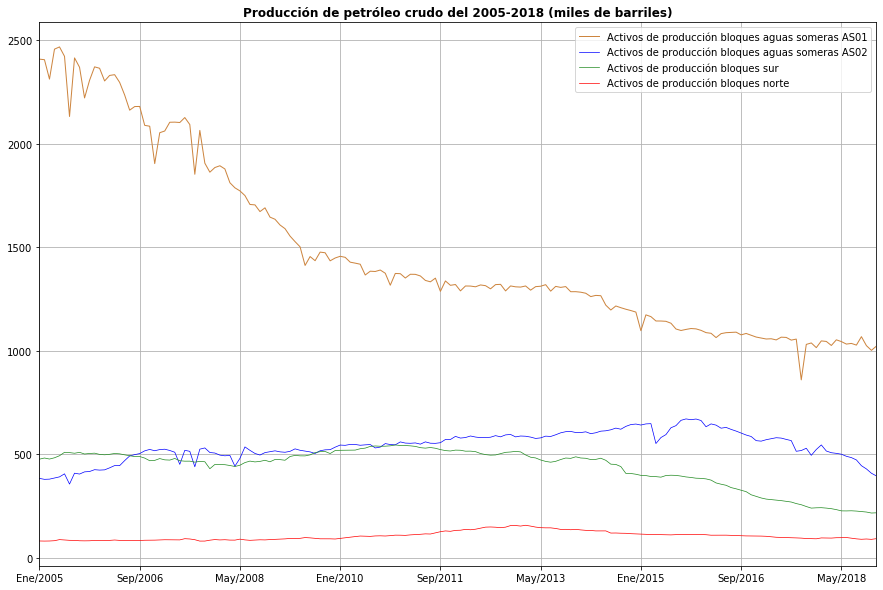

In [5]:

fig, ax = plt.subplots(figsize=(15,10))
p1 = AS01.plot(color='peru', linewidth=1)
p2 = AS02.plot(color='blue', linewidth=0.7)
p3 = SUR.plot(color='forestgreen', linewidth=0.7)
p4 = NORTE.plot(color='red', linewidth=0.7)
plt.legend(loc='upper right')
plt.title('Producción de petróleo crudo del 2005-2018 (miles de barriles)', fontweight='bold')
plt.grid()


A contiuación se genera un pronostico de los siguientes años para la producción de petróleo crudo 

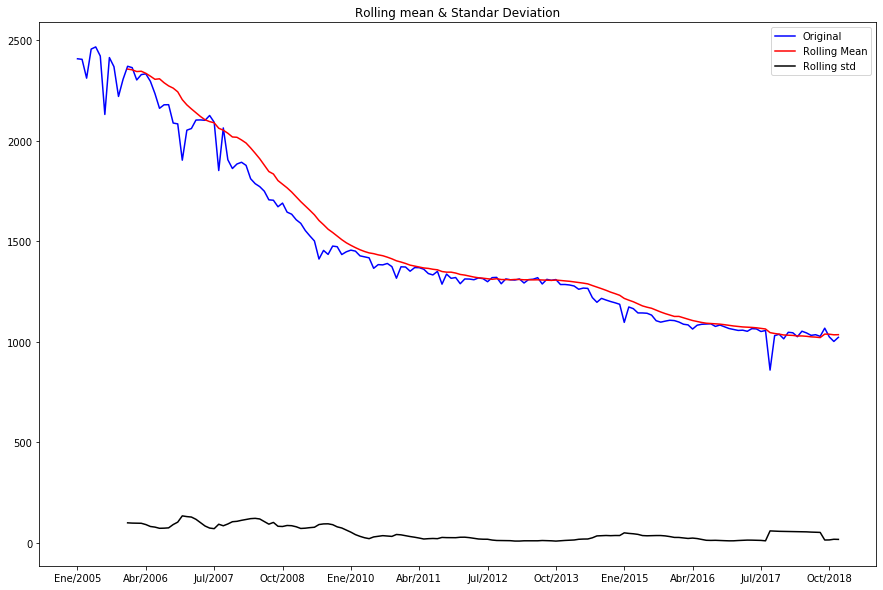

In [87]:
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
rolmean= AS01.rolling(window=12).mean()
rolstd = AS01.rolling(window=12).std()

fig, ax = plt.subplots(figsize=(15,10))
orig = plt.plot(AS01, color='blue', label='Original')
mean = plt.plot(rolmean, color='red', label = 'Rolling Mean')
std = plt.plot(rolstd, color='black', label = 'Rolling std')
plt.legend(loc='best')
plt.title('Rolling mean & Standar Deviation')
ax.set_xticks(np.arange(0,168,15))



In [88]:
#Perform Dickey-Fuller Test:

from statsmodels.tsa.stattools import adfuller

print ('Resultados del Dickey-Fuller Test:')
dftest = adfuller(AS01[1:], autolag = 'AIC')


dfoutput = pd.Series(dftest[0:4], index = ['Test Statics', 'p-value', '#lags Used', 'Number of observations Used'])

for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)' %key] = value
    
print(dfoutput)    


Resultados del Dickey-Fuller Test:
Test Statics                    -2.876016
p-value                          0.048209
#lags Used                       2.000000
Number of observations Used    164.000000
Critical Value (1%)             -3.470866
Critical Value (5%)             -2.879330
Critical Value (10%)            -2.576255
dtype: float64


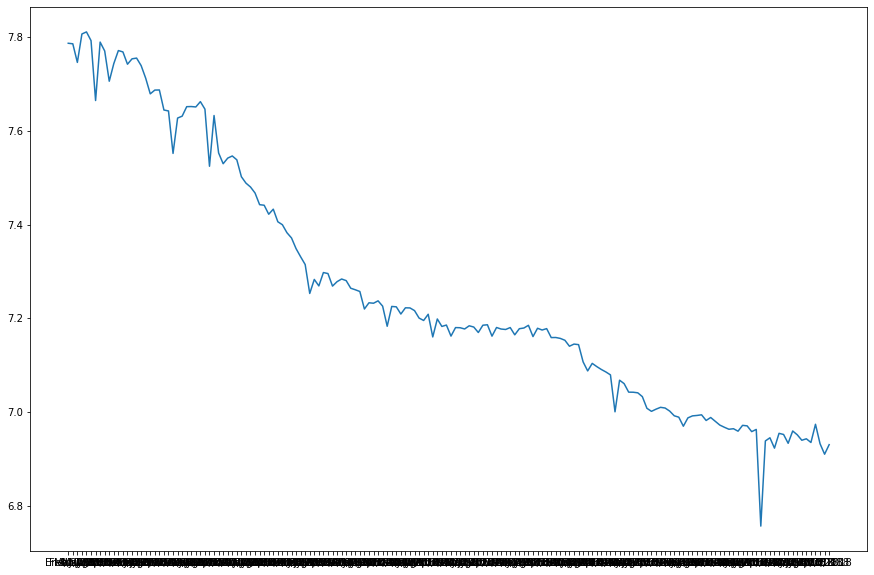

In [9]:
#Estimating trend
fig, ax = plt.subplots(figsize=(15,10))
AS01_logscale = np.log(AS01)
plt.plot(AS01_logscale)



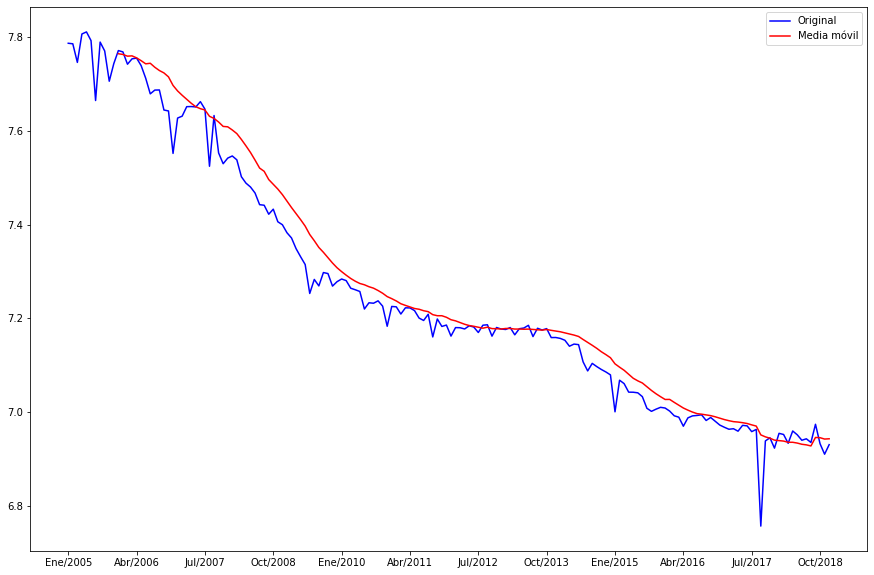

In [89]:
fig, ax = plt.subplots(figsize=(15,10))
movingAverage = AS01_logscale.rolling(window=12).mean()
movingSTD = AS01_logscale.rolling(window=12).std()

plt.plot(AS01_logscale, color='blue', label='Original')
plt.plot(movingAverage, color='red', label = 'Media móvil' )
plt.legend(loc='best')
ax.set_xticks(np.arange(0,168,15))

In [11]:
AS01_logMenosMovingAverage = AS01_logscale - movingAverage
AS01_logMenosMovingAverage.head(12)

AS01_logMenosMovingAverage.dropna(inplace=True)
AS01_logMenosMovingAverage.head(10)

Dic/2005    0.006768
Ene/2006    0.005435
Feb/2006   -0.017198
Mar/2006   -0.006334
Abr/2006   -0.000464
May/2006   -0.010542
Jun/2006   -0.030765
Jul/2006   -0.065262
Ago/2006   -0.048691
Sep/2006   -0.041499
Name: Activos de producción bloques aguas someras AS01, dtype: float64

In [91]:
def test_stationarity(timeseries):
    
    #determinación de la media móvil
    MovingAverage = timeseries.rolling(window=12).mean()
    MovingSTD = timeseries.rolling(window=12).std()
    
    
    #gráfica de la media móvil
    fig, ax = plt.subplots(figsize=(15,10))
    orig = plt.plot(timeseries, color = 'blue', label='Original')
    mean = plt.plot(MovingAverage, color='red', label = 'Media Móvil')
    std = plt.plot(MovingSTD, color = 'black', label='Std Móvil')
    plt.legend(loc='best')
    plt.title('Media y Desviación estandar móvil')
    ax.set_xticks(np.arange(0,168,15))
    plt.show(block = False)
    
    
    #Dickey Fuller Test
    
    print('Resultados de la prueba Dickey Fuller: ')
    dftest = adfuller(timeseries[1:], autolag = 'AIC')
    dfoutput = pd.Series(dftest[0:4], index = ['Test Statics', 'p-value', '#lags Used', 'Number of observations Used'])

    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)' %key] = value
    
    print(dfoutput) 

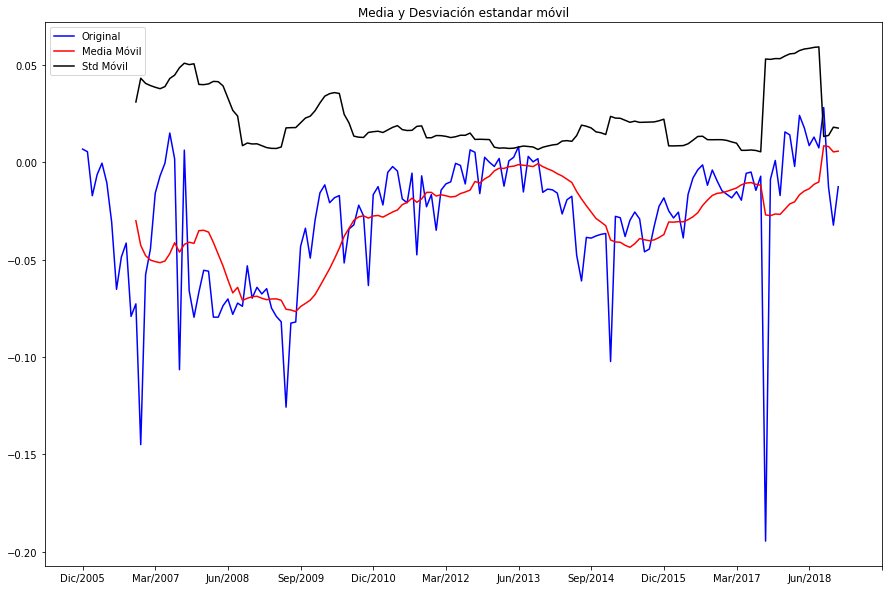

Resultados de la prueba Dickey Fuller: 
Test Statics                    -3.474679
p-value                          0.008662
#lags Used                       2.000000
Number of observations Used    153.000000
Critical Value (1%)             -3.473830
Critical Value (5%)             -2.880623
Critical Value (10%)            -2.576945
dtype: float64


In [92]:
test_stationarity(AS01_logMenosMovingAverage)


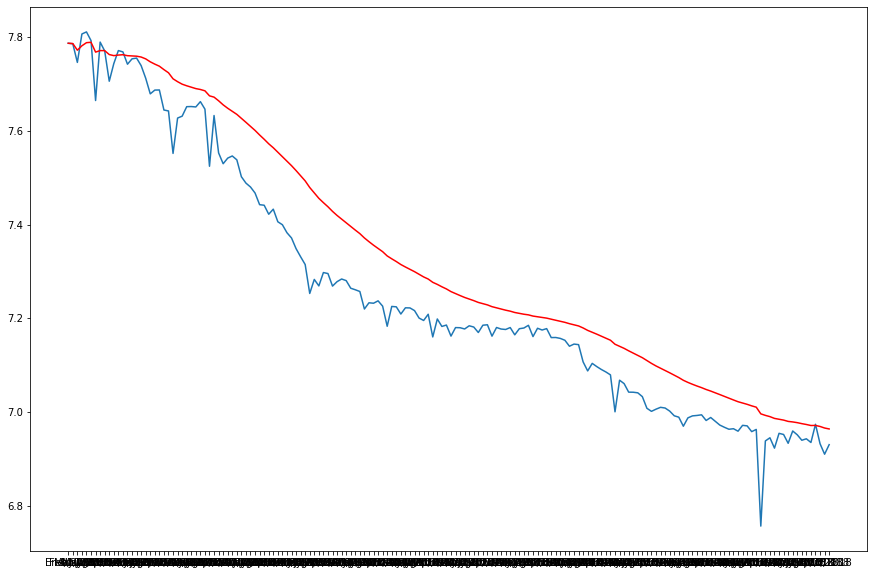

In [14]:
ExponentialDecayWeightedAverage = AS01_logscale.ewm(halflife=12, min_periods=0, adjust=True).mean()
fig, ax = plt.subplots(figsize=(15,10))
plt.plot(AS01_logscale)
plt.plot(ExponentialDecayWeightedAverage, color='red')

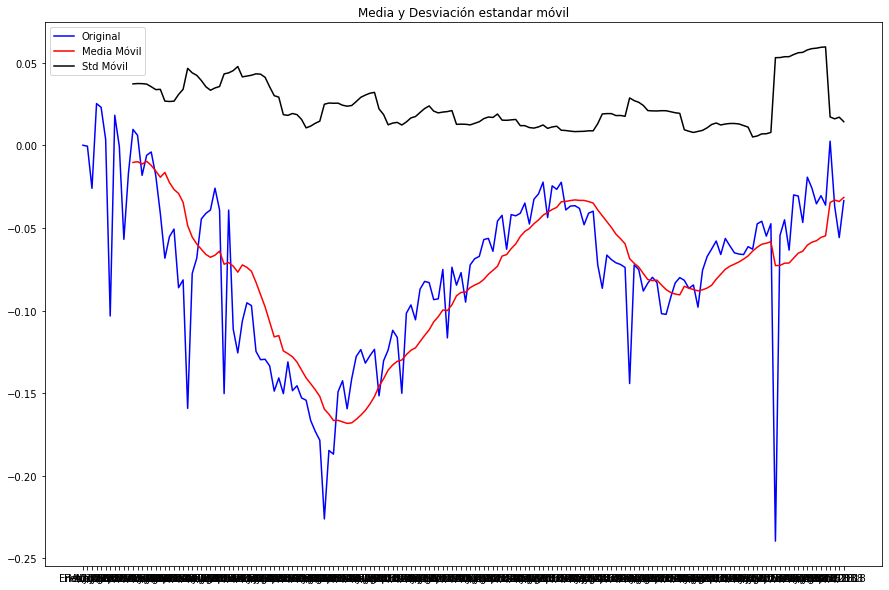

Resultados de la prueba Dickey Fuller: 
Test Statics                    -2.490850
p-value                          0.117717
#lags Used                       2.000000
Number of observations Used    164.000000
Critical Value (1%)             -3.470866
Critical Value (5%)             -2.879330
Critical Value (10%)            -2.576255
dtype: float64


In [15]:
AS01_logMenosExponentialDecayWeightedAverage = AS01_logscale - ExponentialDecayWeightedAverage
test_stationarity(AS01_logMenosExponentialDecayWeightedAverage)

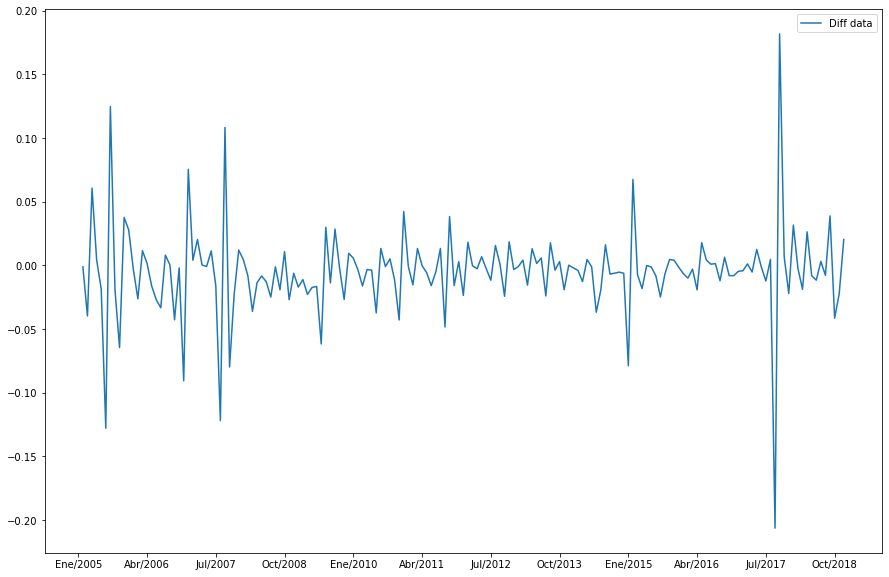

In [90]:
AS01_logDiffShift = AS01_logscale - AS01_logscale.shift()
fig, ax = plt.subplots(figsize=(15,10))
plt.plot(AS01_logDiffShift, label = 'Diff data')
plt.legend(loc='best')
ax.set_xticks(np.arange(0,168,15))

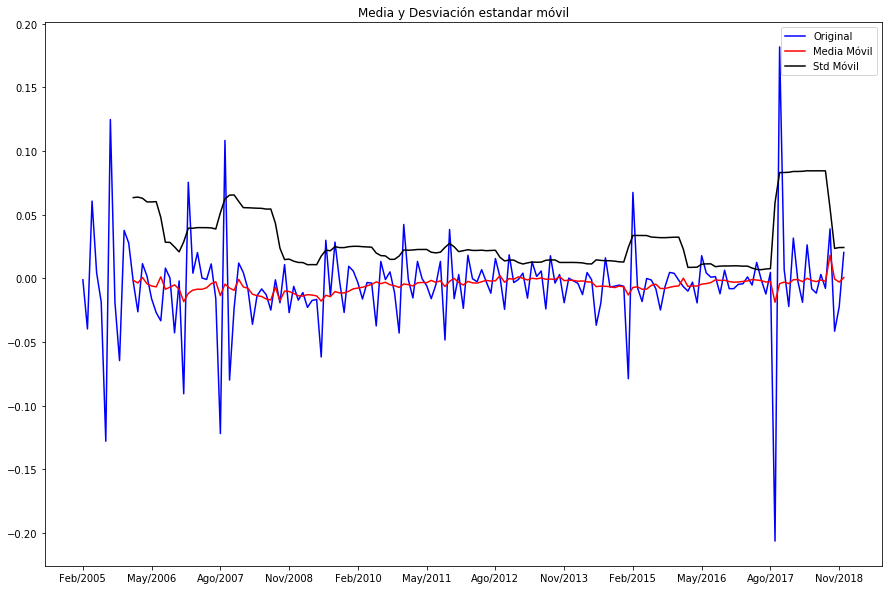

Resultados de la prueba Dickey Fuller: 
Test Statics                  -1.495981e+01
p-value                        1.244423e-27
#lags Used                     1.000000e+00
Number of observations Used    1.640000e+02
Critical Value (1%)           -3.470866e+00
Critical Value (5%)           -2.879330e+00
Critical Value (10%)          -2.576255e+00
dtype: float64


In [93]:
AS01_logDiffShift.dropna(inplace=True)
test_stationarity(AS01_logDiffShift)

/home/ave/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


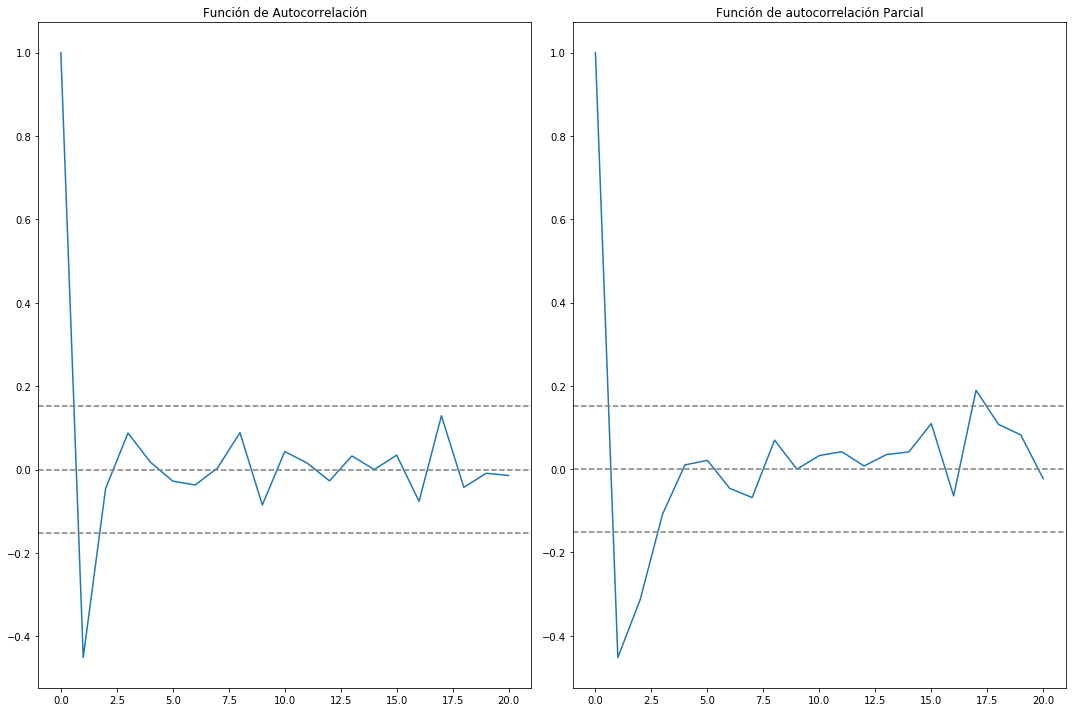

In [18]:
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(AS01_logDiffShift, nlags=20)
lag_pacf = pacf(AS01_logDiffShift, nlags=20, method='ols')


#plot ACF
fig, ax = plt.subplots(figsize=(15,10))
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y =-1.96/np.sqrt(len(AS01_logDiffShift)), linestyle='--', color='gray')
plt.axhline(y =1.96/np.sqrt(len(AS01_logDiffShift)), linestyle='--', color='gray')
plt.title('Función de Autocorrelación')


#grafica PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y =-1.96/np.sqrt(len(AS01_logDiffShift)), linestyle='--', color='gray')
plt.axhline(y =1.96/np.sqrt(len(AS01_logDiffShift)), linestyle='--', color='gray')
plt.title('Función de autocorrelación Parcial')
plt.tight_layout()



/home/ave/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/ave/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


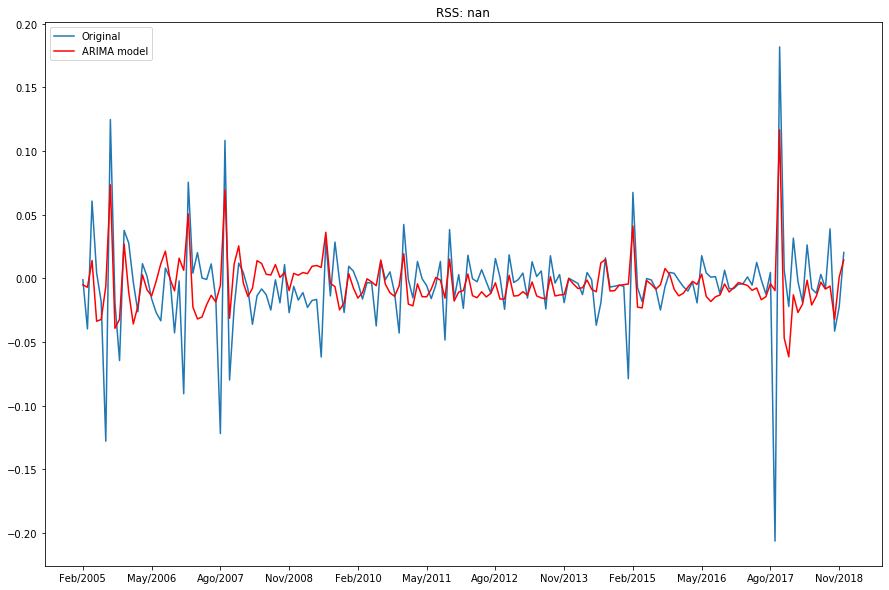

In [96]:
from statsmodels.tsa.arima_model import ARIMA

#ARIMA model
model = ARIMA(AS01_logscale, order=(2,1,1))
results_ARIMA= model.fit()
fig, ax = plt.subplots(figsize=(15,10))
plt.plot(AS01_logDiffShift, label = 'Original')
plt.plot(results_ARIMA.fittedvalues, color='red', label = 'ARIMA model')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-AS01_logDiffShift[1:])**2))
plt.legend(loc='best')
ax.set_xticks(np.arange(0,168,15))


In [20]:
predictions_ARIMA_Diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_Diff.head())

Feb/2005   -0.005165
Mar/2005   -0.006974
Abr/2005    0.014007
May/2005   -0.033654
Jun/2005   -0.032279
dtype: float64


In [21]:
#convertir a cuma acumulativa
predictions_ARIMA_diff_cumsum = predictions_ARIMA_Diff.cumsum()
print(predictions_ARIMA_diff_cumsum)

Feb/2005   -0.005165
Mar/2005   -0.012139
Abr/2005    0.001868
May/2005   -0.031786
Jun/2005   -0.064065
              ...   
Ago/2018   -0.830214
Sep/2018   -0.836270
Oct/2018   -0.868474
Nov/2018   -0.867498
Dic/2018   -0.852988
Length: 167, dtype: float64


In [22]:
predictions_ARIMA_log = pd.Series(AS01_logscale[1:].iloc[0], index=AS01_logscale.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)
predictions_ARIMA_log.head()

Abr/2005    7.787694
Abr/2006    7.669622
Abr/2007    7.664240
Abr/2008    7.669273
Abr/2009    7.717229
dtype: float64

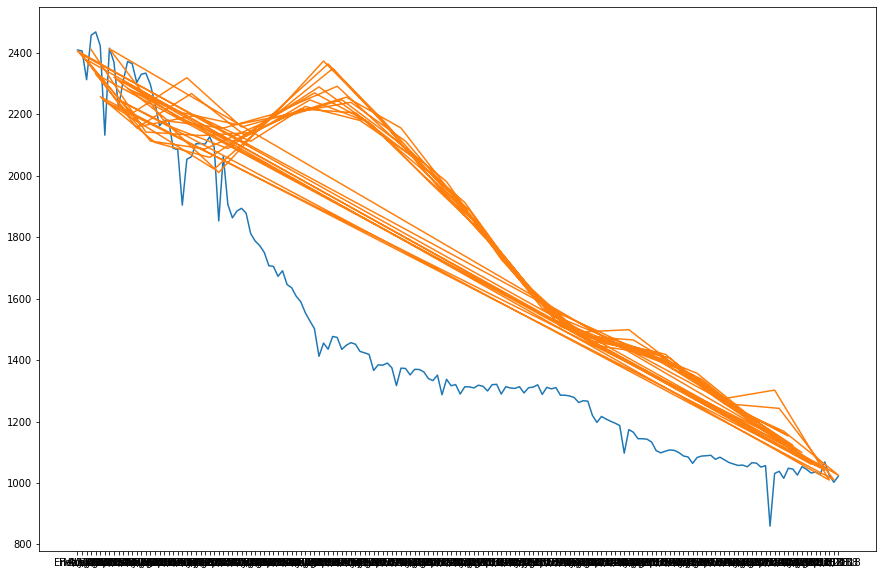

In [23]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
fig, ax = plt.subplots(figsize=(15,10))
plt.plot(AS01)
plt.plot(predictions_ARIMA)

In [25]:
AS01

Ene/2005    2409.018153
Feb/2005    2406.252844
Mar/2005    2312.586592
Abr/2005    2457.232182
May/2005    2468.071462
               ...     
Ago/2018    1027.707191
Sep/2018    1068.393193
Oct/2018    1025.007575
Nov/2018    1002.325963
Dic/2018    1022.920805
Name: Activos de producción bloques aguas someras AS01, Length: 168, dtype: float64

/home/ave/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/home/ave/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/home/ave/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


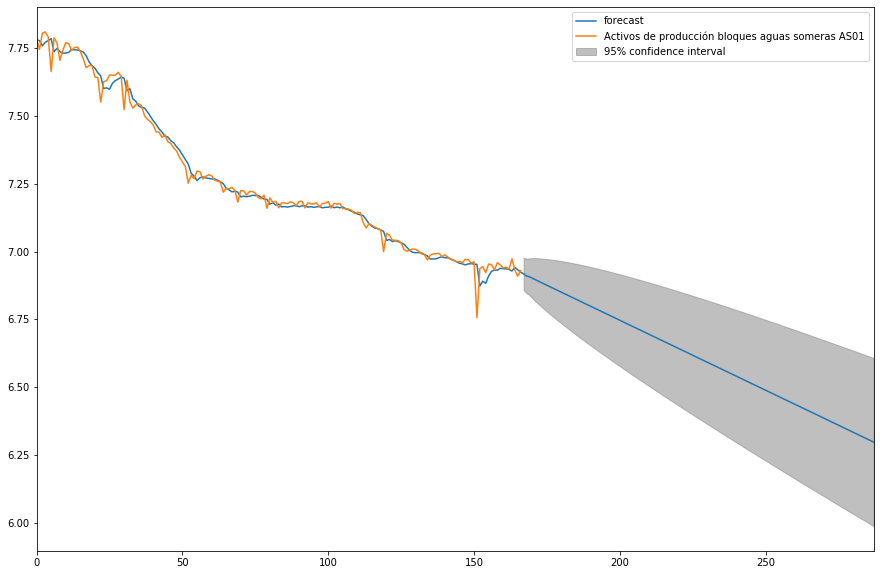

In [24]:
rcParams['figure.figsize'] = 15,10
fig=results_ARIMA.plot_predict(1, 288)


(-1.1115021154849267,
 1.1262788396067196,
 -1.1016865731048078,
 1.1166633021154222)

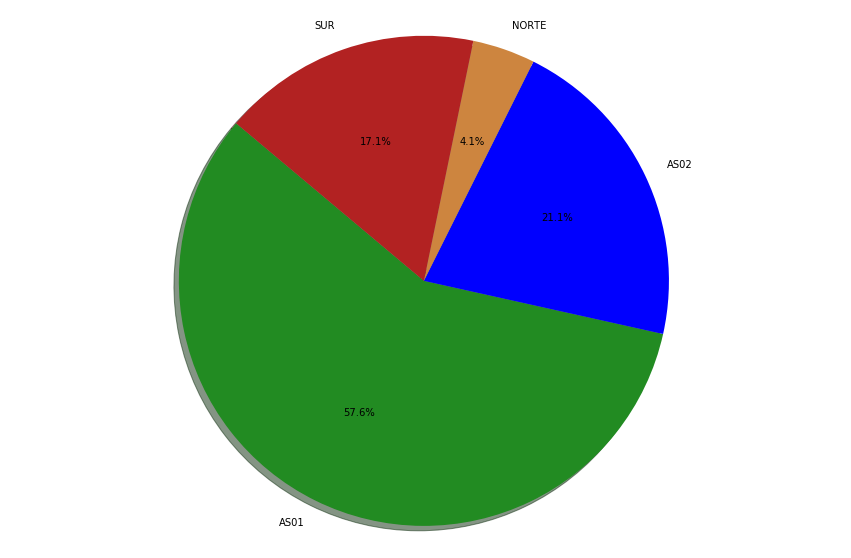

In [25]:
#pie chart de los activos de produccion

labels = 'AS01', 'AS02', 'NORTE', 'SUR'
sizes = [AS01.sum(), AS02.sum(), NORTE.sum(), SUR.sum()]
colores= ['forestgreen', 'blue', 'peru', 'firebrick']
plt.pie(sizes, labels=labels, colors=colores, autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')